In [2]:
%matplotlib inline

/Users/Xianbo/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
import numpy as np
import pandas as pd
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.signal import find_peaks_cwt
from scipy import signal, interpolate

In [4]:
spectra = pd.read_csv('data/Unknown_sample_spectra.csv')

In [5]:
max(spectra.Average)

117

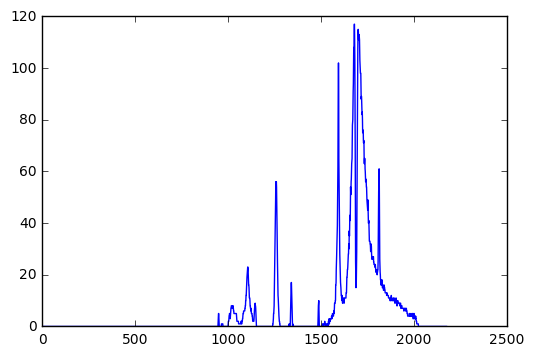

In [6]:
plt.plot(spectra.Average)

In [7]:
# The txt file contains: wavelength and intensity
# the wavelength is in microns not nanometers
fname = 'data/known_spectra_peaks/argon.txt'
Ar = np.loadtxt(fname)
fname = 'data/known_spectra_peaks/barium.txt'
Ba = np.loadtxt(fname)
fname = 'data/known_spectra_peaks/hydrogen.txt'
H = np.loadtxt(fname)
fname = 'data/known_spectra_peaks/mercury.txt'
Me = np.loadtxt(fname)
fname = 'data/known_spectra_peaks/sodium.txt'
So = np.loadtxt(fname)

In [8]:
def scale(x, in_min, in_max, out_min, out_max):
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

In [9]:
# rescale intensities to values between 0-255.  This is scale of 
# the captured image
Ar[:,1] = scale(Ar[:,1], Ar[:,1].min(), Ar[:,1].max(), 0 , 255)

In [10]:
# convert to nanometers
Ar[:,0] = Ar[:,0] / 10

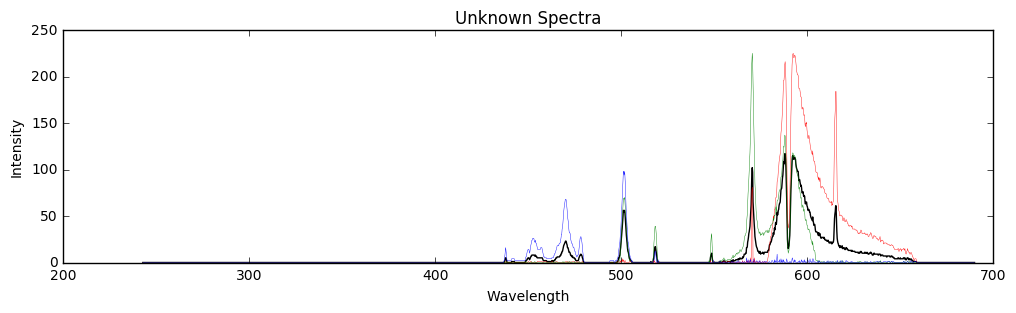

In [11]:
fig, ax = plt.subplots(1, figsize=(12,3))

x = spectra['Wavelength']

plt.plot(x, spectra['Average'], color='black')
plt.plot(x, spectra['Red'], color='red', lw=0.3)
plt.plot(x, spectra['Green'], color='green', lw=0.3)
plt.plot(x, spectra['Blue'], color='blue', lw=0.3)
plt.title("Unknown Spectra")
plt.xlabel('Wavelength')
plt.ylabel('Intensity')

In [12]:
avg_spectra = scale(spectra['Average'], spectra['Average'].min(), spectra['Average'].max(), 0, 255)

In [13]:
i = Ar
i[:0]

array([], shape=(0, 2), dtype=float64)

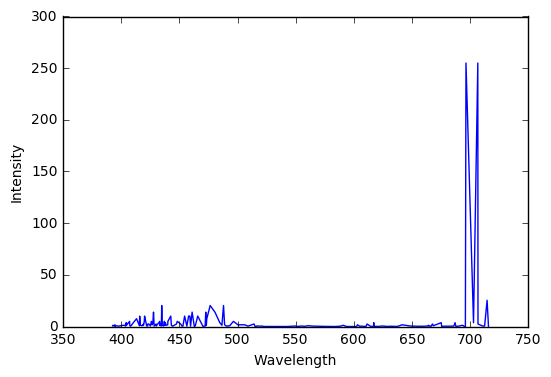

In [14]:
# hmm...doesnt seem similar...must be something else...

plt.plot(Ar[:,0], Ar[:,1])
#plt.plot(x, spectra['Average'], color='black')
#plt.title('Comparison with known Spectra')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')

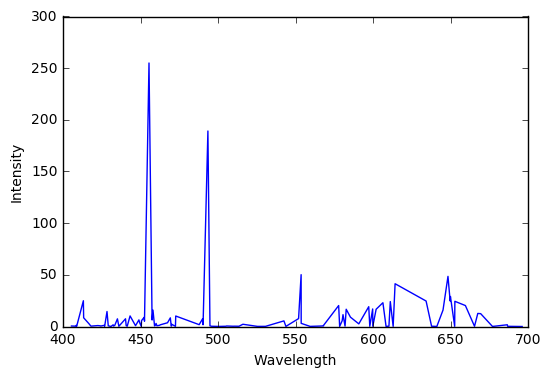

In [15]:
Ba[:,1] = scale(Ba[:,1], Ba[:,1].min(), Ba[:,1].max(), 0 , 255)
Ba[:,0] = Ba[:,0] / 10
plt.plot(Ba[:,0], Ba[:,1])
#plt.plot(x, spectra['Average'], color='black')
#plt.title('Comparison with known Spectra')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')

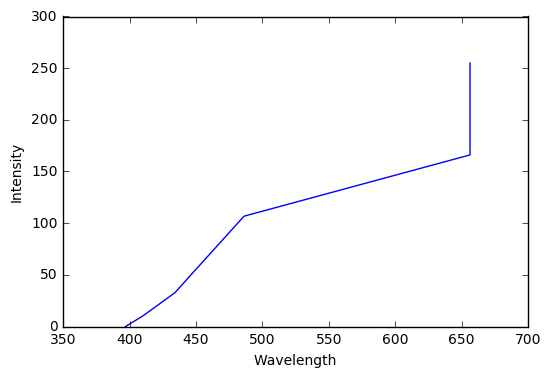

In [16]:
H[:,1] = scale(H[:,1], H[:,1].min(), H[:,1].max(), 0 , 255)
H[:,0] = H[:,0] / 10
plt.plot(H[:,0], H[:,1])
#plt.plot(x, spectra['Average'], color='black')
#plt.title('Comparison with known Spectra')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')

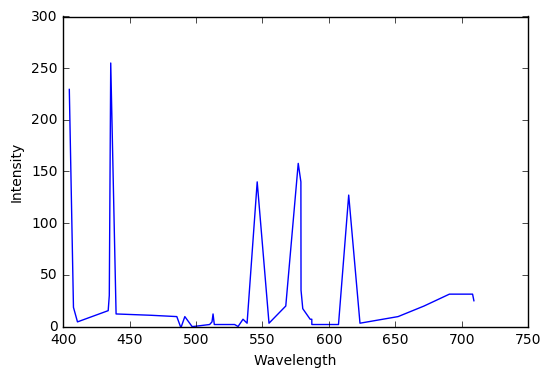

In [17]:
Me[:,1] = scale(Me[:,1], Me[:,1].min(), Me[:,1].max(), 0 , 255)
Me[:,0] = Me[:,0] / 10
plt.plot(Me[:,0], Me[:,1])
#plt.plot(x, spectra['Average'], color='black')
#plt.title('Comparison with known Spectra')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')

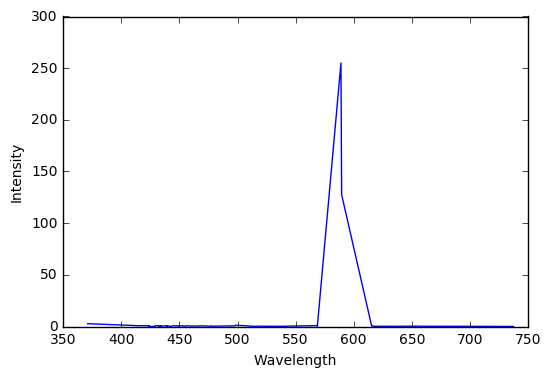

In [18]:
So[:,1] = scale(So[:,1], So[:,1].min(), So[:,1].max(), 0 , 255)
So[:,0] = So[:,0] / 10
plt.plot(So[:,0], So[:,1])
#plt.plot(x, spectra['Average'], color='black')
#plt.title('Comparison with known Spectra')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')

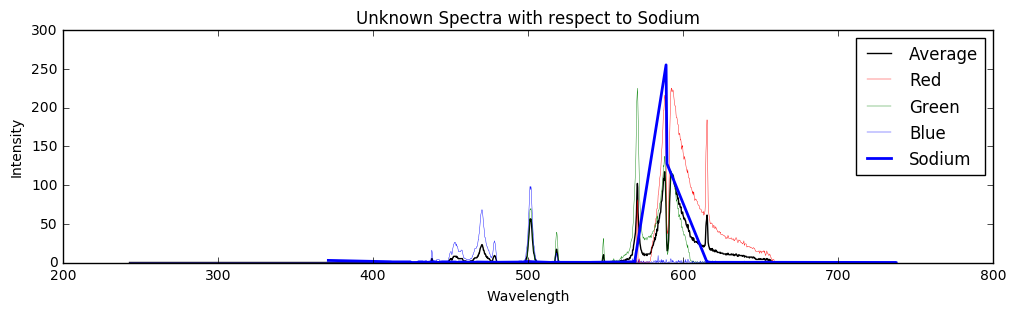

In [19]:
fig, ax = plt.subplots(1, figsize=(12,3))

x = spectra['Wavelength']

plt.plot(x, spectra['Average'], color='black')
plt.plot(x, spectra['Red'], color='red', lw=0.3)
plt.plot(x, spectra['Green'], color='green', lw=0.3)
plt.plot(x, spectra['Blue'], color='blue', lw=0.3)
plt.plot(So[:,0], So[:,1], label = 'Sodium', lw = 2)
plt.title("Unknown Spectra with respect to Sodium")
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.legend()

In [35]:
Ar[Ar[:,1].argmax(),0]

696.54300000000001

In [36]:
Ba[Ba[:,1].argmax(),0]

455.40330000000006

In [37]:
H[H[:,1].argmax(),0]

656.28500000000008

In [38]:
Me[Me[:,1].argmax(),0]

435.83299999999997

In [29]:
So[So[:,1].argmax(),0]

588.995

In [33]:
x[spectra['Average'].argmax()]

587.98599999999999

In [ ]:
#Sodium is the most likely result 
#because the wavelength of the peak value of the spectra['Average'] is closest to Sodium

## Misc - Remove background noise

In [214]:
Mg = nd.imread('data/sodium_spectra.jpg')

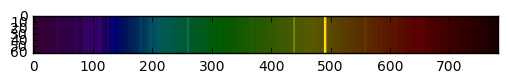

In [215]:
plt.imshow(Mg)

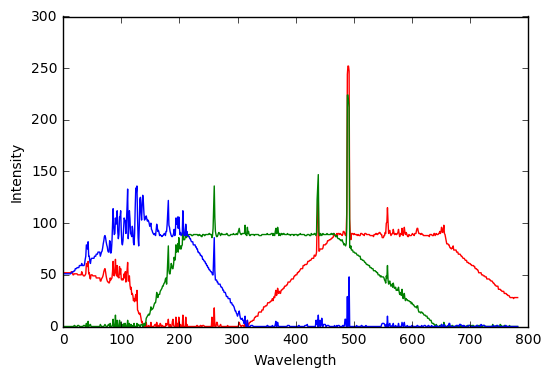

In [216]:
# plot individual color channels (r,g,b).  Notice the three 'bands'.  The colors
# should be filtered to just those bands (notice the red channel located in the 0-100
# nanometer section)
plt.plot(Mg[:,:,0].mean(axis=0), c='r')
plt.plot(Mg[:,:,1].mean(axis=0), c='g')
plt.plot(Mg[:,:,2].mean(axis=0), c='b')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')

In [217]:
# The spline function is meant to model the background noise.  First, model the
# signal. Then take the first derivative which should remove the background.
#
# Then use a filter to remove values beyond the main spectra area.  For example,
# the red channel has values from 0-100 which should be removed.  This should be 
# gaussian and is not implemented yet

def spline(y):
    x = np.arange(y.shape[0])
    tck = interpolate.splrep(x, y, s=822) # m + sqrt(2*m)
    xnew = np.arange(0,783)
    
    # take the first derivative
    ynew = interpolate.splev(xnew, tck, der=1)
    return xnew, np.abs(ynew)

res = []
for i in range(3):
    y = Mg[:,:,i].mean(axis=0)
    xnew, ynew = spline(y)
    res.append(ynew)

In [220]:
np.linspace(380,750,8)

array([ 380.        ,  432.85714286,  485.71428571,  538.57142857,
        591.42857143,  644.28571429,  697.14285714,  750.        ])

In [221]:
ax.plot(x, spectra['Average'], color='black')
ax.plot(x, spectra['Red'], color='red', lw=0.3)
ax.plot(x, spectra['Green'], color='green', lw=0.3)
ax.plot(x, spectra['Blue'], color='blue', lw=0.3)

In [224]:
len(res[0])

783

In [229]:
xx = np.linspace(380,750,783)

In [227]:
len(xx)

784

In [228]:
len(res[0])

783

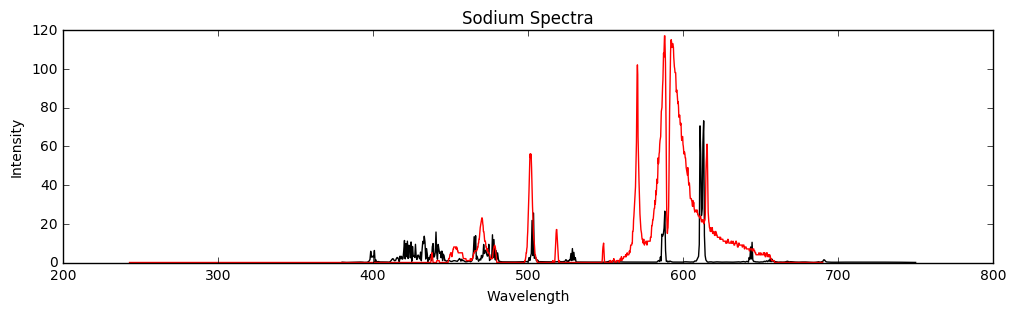

In [241]:
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(xx,np.array(res).T.mean(axis=1), c='black')
#ax.plot(xx,res[0], c='r', lw=0.3)
#ax.plot(xx,res[1], c='g', lw=0.3)
#ax.plot(xx,res[2], c='b', lw=0.3)

ax.plot(x, spectra['Average'], color='r')
#ax.plot(x, spectra['Red'], color='red', lw=1.3)
#ax.plot(x, spectra['Green'], color='green', lw=1.3)
#ax.plot(x, spectra['Blue'], color='blue', lw=1.3)

#ax.set_xticks(np.linspace(0,800,9))
#ax.set_xticklabels(np.linspace(380,750,9))
plt.title('Sodium Spectra')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')


In [ ]:
c

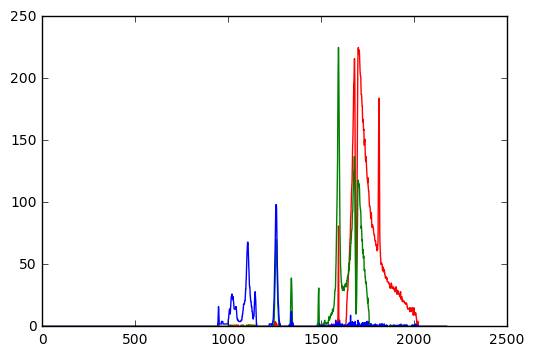

In [103]:
plt.plot(spectra.Red,color = 'r')
plt.plot(spectra.Green, color = 'g')
plt.plot(spectra.Blue, color = 'b')